In [1]:
import tensorflow as tf
import numpy as np
rng = np.random

import matplotlib.pyplot as plt
learning_rate = 0.0001
training_epochs = 1000
display_step = 50

In [2]:
with tf.name_scope("Creation_of_array"):
    x_array=np.asarray([2.0,9.4,3.32,0.88,-2.23,1.11,0.57,-2.25,-3.31,6.45])
    y_array=np.asarray([1.22,0.34,-0.08,2.25,4.41,3.09,-6.66,-9.77,0.001,2.25])
    x = tf.constant(x_array,dtype = tf.float32,name = "x_array")
    y = tf.constant(y_array,dtype = tf.float32, name= "y_array")
with tf.name_scope("Calculating_y_mean"):
    mean_y = tf.reduce_mean(y, name = "mean_y")
    with tf.Session() as sess:
        result_y = sess.run(mean_y)
        print(result_y)

-0.2949


In [3]:
with tf.name_scope("Calculating_x_mean_and_x_variance"):
    mean_x, variance = tf.nn.moments(x, [0], name = "mean_x_and_variance_x")
    with tf.Session() as sess:
        m, v = sess.run([mean_x, variance])
        print(m)
        print(v)

1.594
14.2899


In [4]:
with tf.name_scope("Calculating_covariance"):
    def tensorflow_covariance(x_array,y_array,x_mean,y_mean):
        cov = 0.0
        for i in range(0,10):
            x_val = tf.subtract(x_array[i],x_mean, name="Finding_difference_of_xval_and_mean")
            y_val = tf.subtract(y_array[i],y_mean, name="Finding_difference_of_yval_and_mean")
            total_val = tf.multiply(x_val,y_val, name="Multiplying_found_values")
            cov = tf.add(cov,total_val, name="Recursive_addition")
        return cov/10.0
    with tf.Session() as sess:
        covar = sess.run(tensorflow_covariance(x,y,m,result_y))
        print(covar)

3.83422


In [5]:
with tf.name_scope("Calculating_slope_m_and_c"):
    slope = tf.div(covar,v,name="Finding_slope")
    intm = tf.multiply(slope,m,name = "Intermediate_step")
    c_intm = tf.subtract(result_y,intm,name = "Finding_c")

    with tf.Session() as sess:
        m_slope = sess.run(slope)
        c = sess.run(c_intm)
        print(m_slope)
        print(c)

0.268316
-0.722596


Epoch: 0050 cost= 12.125116348 W= -0.446558 b= 0.321133
Epoch: 0100 cost= 11.630267143 W= -0.396823 b= 0.321412
Epoch: 0150 cost= 11.212119102 W= -0.351104 b= 0.32131
Epoch: 0200 cost= 10.858688354 W= -0.309074 b= 0.32086
Epoch: 0250 cost= 10.559865952 W= -0.270432 b= 0.320092
Epoch: 0300 cost= 10.307125092 W= -0.234903 b= 0.319033
Epoch: 0350 cost= 10.093267441 W= -0.202233 b= 0.317708
Epoch: 0400 cost= 9.912219048 W= -0.17219 b= 0.31614
Epoch: 0450 cost= 9.758859634 W= -0.144559 b= 0.314351
Epoch: 0500 cost= 9.628865242 W= -0.119145 b= 0.31236
Epoch: 0550 cost= 9.518587112 W= -0.0957664 b= 0.310185
Epoch: 0600 cost= 9.424952507 W= -0.074258 b= 0.307843
Epoch: 0650 cost= 9.345363617 W= -0.0544675 b= 0.305348
Epoch: 0700 cost= 9.277628899 W= -0.0362551 b= 0.302715
Epoch: 0750 cost= 9.219902039 W= -0.0194925 b= 0.299955
Epoch: 0800 cost= 9.170622826 W= -0.00406161 b= 0.297082
Epoch: 0850 cost= 9.128476143 W= 0.0101459 b= 0.294105
Epoch: 0900 cost= 9.092351913 W= 0.0232295 b= 0.291034
Ep

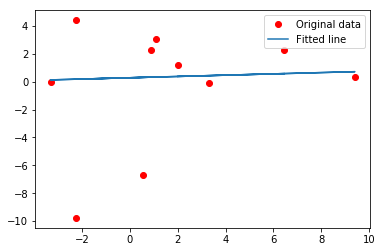

In [6]:
with tf.name_scope("Plotting"):
    n_samples = x_array.shape[0]
    X = tf.placeholder("float")
    Y = tf.placeholder("float")

    # Set model weights
    W = tf.Variable(rng.randn(), name="weight")
    b = tf.Variable(rng.randn(), name="bias")

    # Construct a linear model
    pred = tf.add(tf.multiply(X, W), b)


    # Mean squared error
    cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
    # Gradient descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    # Initializing the variables
    init = tf.global_variables_initializer()

    # Launch the graph
    with tf.Session() as sess:
        sess.run(init)

        # Fit all training data
        for epoch in range(training_epochs):
            for (p, r) in zip(x_array, y_array):
                sess.run(optimizer, feed_dict={X: p, Y: r})

            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                c = sess.run(cost, feed_dict={X: x_array, Y:y_array})
                print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                    "W=", sess.run(W), "b=", sess.run(b))

        print("Optimization Finished!")
        training_cost = sess.run(cost, feed_dict={X: x_array, Y: y_array})
        print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

        # Graphic display
        plt.plot(x_array, y_array, 'ro', label='Original data')
        plt.plot(x_array, sess.run(W) * x_array + sess.run(b), label='Fitted line')
        plt.legend()
        plt.show()